<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Optimization Practical Assignment (20 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this notebook you will learn to implement gradient descent algorithm. we will use 3 functions and run gradient descent on each and try to visualise the algorithm with different learning rates.

In [1]:
# do not import other packages for this assignment
import numpy as np
from matplotlib import pyplot as plt

# 1-implement functions and their derivative

the three functions we are going to use are as follow:

a)
$f_1(x) = x\sin(\frac{\pi x}{40}) - \frac{x}{500} \quad $ where $\quad x \in [35, 80]$
<br/>
b)
$f_2(x) = \sin^2(\frac{\pi x}{50}) + \cos(\frac{\pi x}{50} - 2) \quad $ where $\quad x \in [5, 50]$
<br/>
c)
$f_3(x) = x\sin(x) \quad $ where $\quad x \in [400, 1500]$

use the numpy library mathematic function in order to make the functions vectorized.

In [2]:
# 3 points

def f1(x):
    return ((x * np.sin(x * np.pi / 40)) - (x / 500))

def f2(x):
    return ((np.sin(x * np.pi / 50) * np.sin(x * np.pi / 50)) + np.cos((x * np.pi / 50) - 2))

def f3(x):
    return x * np.sin(x / 30)

run the code block below to plot the three functions.

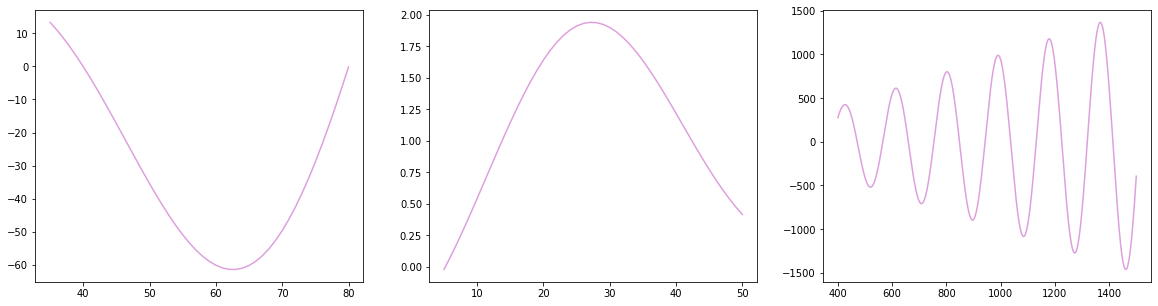

In [3]:
f1_range = np.arange(35, 81)
f2_range = np.arange(5, 51)
f3_range = np.arange(400, 1501)

fig, axs = plt.subplots(1,3,figsize=(20, 5))
axs[0].plot(f1_range, f1(f1_range), color = 'plum')
axs[1].plot(f2_range, f2(f2_range), color = 'plum')
axs[2].plot(f3_range, f3(f3_range), color = 'plum')

write your answer to these questions on the next cell.  
Q1) which of these functions are convex or concave?  
Q2) can gradient descent be used to find the maximum of the second function?

<font color=red>
(4 points)    
<br/>
Q1 - f1 is convex. f2 is concave. 
<br/>
Q2 - gradient ascent can be used because it's concave. 
</font>

# 2-implement gradient descent

complete the code below to implement gradient descent. in order to implement gradient descent you need to compute the derivatives. However, you dont have to compute the exact derivative terms and can instead use the numerical formula below to approximate it.

\begin{align}
    f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}
\end{align}    

In [4]:
# 5 points
def gradient_descent(func, initial_point, learning_rate=0.1, num_iter=800):
    
    num_variables = 1
    results = np.zeros((num_iter+1, num_variables))
    iteration = 0
    x = initial_point
    results[0] = x
    
    while iteration < num_iter:
        d = (func(x + 0.00001)[0] - func(x - 0.00001)[0]) / 0.00002
        to_subtract = d * learning_rate
        x = x - to_subtract
        results[iteration + 1] = x
        iteration += 1
    
    print(f'gradient descent found {func(x)[0]} as the minimum of the function on point {x}')
    
    return results

lets run gradient descent on the first function and see the result.

In [5]:
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=0.1)

gradient descent found -61.42485250199331 as the minimum of the function on point [62.56144043]


Now we will visualize each step of gradient descent with the help of the next function.

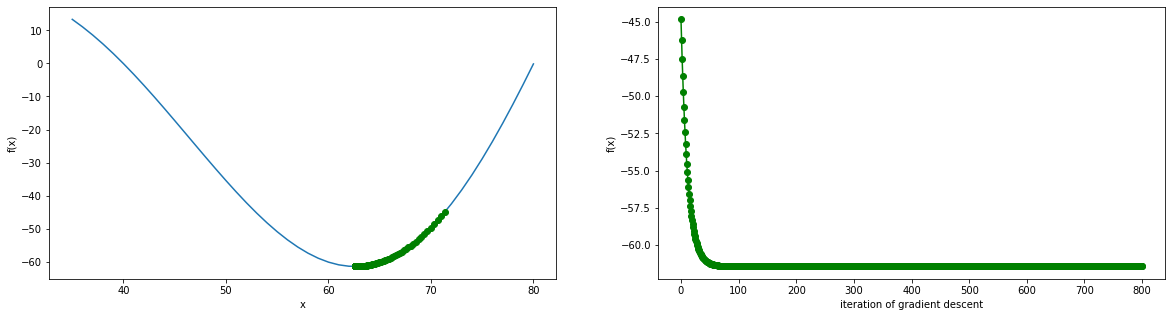

In [6]:
def plot_gradient_descent1D(func, x_range, results):
    fig, axs = plt.subplots(1,2,figsize=(20, 5))
    # see x through each step of gradient descent
    axs[0].plot(x_range, func(x_range))
    axs[0].plot(results, func(results), 'og-')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')
    # see y though each step of gradient descent
    axs[1].plot(np.arange(0, len(results)), func(results), 'og-')
    axs[1].set_xlabel('iteration of gradient descent')
    axs[1].set_ylabel('f(x)')

plot_gradient_descent1D(f1, f1_range, results)

now lets try different values for the learning rate and see the results.

gradient descent found -58.633641988677375 as the minimum of the function on point [66.20261204]


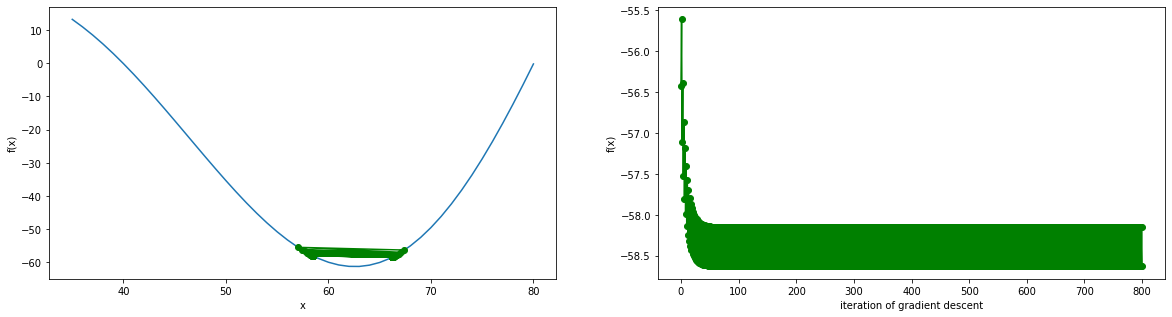

In [7]:
# learning rate = 5
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=5)
plot_gradient_descent1D(f1, f1_range, results)

gradient descent found -26.6836213248543 as the minimum of the function on point [47.5544021]


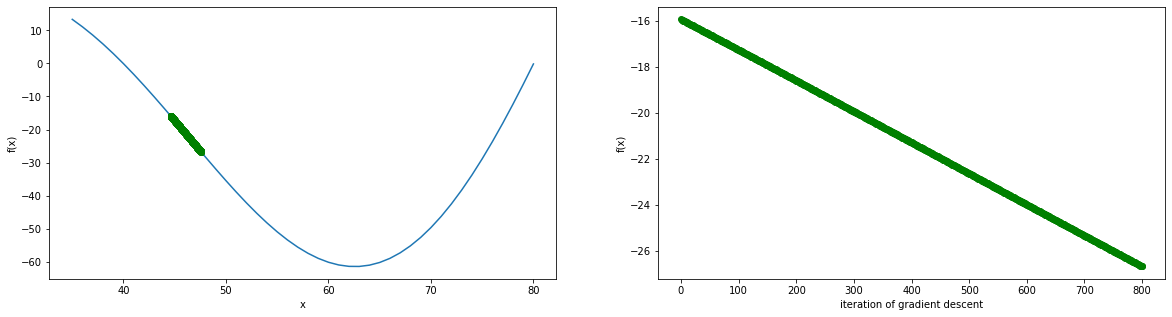

In [8]:
# learning rate = 0.001
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=0.001)
plot_gradient_descent1D(f1, f1_range, results)

write your answer to this question on the next cell.   
what happened when we set the learning rate to 5?   
what happened when we set the learning rate to 0.001?   

<font color=red>
(4 points)    
<br/>
Q1 - 5 is too big - it doesn't converge and it jumps over the point
<br/> 
Q2 - 0.001 is too small - it doesn't converge in this duration because it's too slow
</font>

Now let try to run gradient descent on the third function and see what happens. be sure to run the next cell multiple times to see how the random initial point will impact the final result.

gradient descent found -707.4939194890007 as the minimum of the function on point [708.12854318]


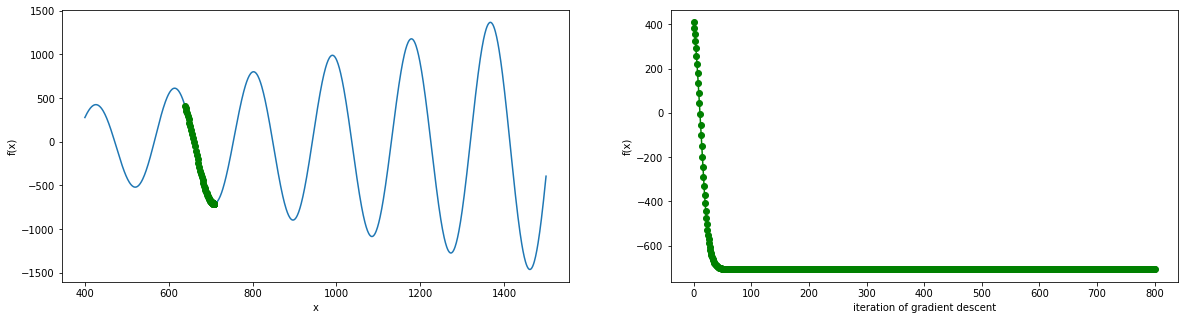

In [9]:
results = gradient_descent(f3, np.random.uniform(500,1000,1), learning_rate=0.1)
plot_gradient_descent1D(f3, f3_range, results)

# 3-implement gradient descent for two-dimensional functions

In this part you will implement gradient descent for a two dimensional function. the function we are going to use is as follows:

$f(x_1,x_2) = -\exp(-\frac{x_1^2+x_2^2}{2}) \quad $ where $\quad x_1,x_2 \in [-2, 2]*[-2, 2]$

implement the needed functions in the next cell.

In [10]:
# 4 points

def f(x1, x2):
    return -np.exp(-((x1 * x1) + (x2 * x2)) / 2)

def gradient_descent_2d(func, initial_point, learning_rate=0.1, num_iter=50):
    num_variables = 2
    results = np.zeros((num_iter+1, num_variables))
    iteration = 0
    x = initial_point
    results[0] = x
    
    while iteration < num_iter:
        d0 = (func(x[0] + 0.00001, x[1]) - func(x[0] - 0.00001, x[1])) / 0.00002
        d1 = (func(x[0], x[1] + 0.00001) - func(x[0], x[1] - 0.00001)) / 0.00002
        to_subtract0 = d0 * learning_rate
        to_subtract1 = d1 * learning_rate
        x[0] = x[0] - to_subtract0
        x[1] = x[1] - to_subtract1      
        results[iteration + 1] = x
        iteration += 1
    return results

In [11]:
results = gradient_descent_2d(f, np.random.uniform(-2,2,2))

we will visualize this 2d function using contours plot.

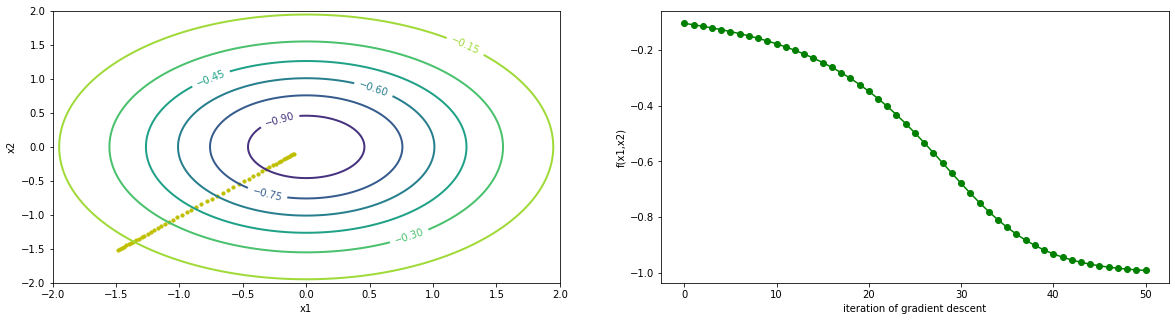

In [12]:
def contour_plot(func, results):
    fig, axs = plt.subplots(1,2,figsize=(20, 5))
    # see x through each step of gradient descent
    x1, x2 = np.meshgrid(np.linspace(-2.0, 2, 200), np.linspace(-2, 2, 200))
    y = func(x1, x2)
    cp = axs[0].contour(x1, x2, y, linewidths=2)
    axs[0].clabel(cp, inline=1, fontsize=10)
    axs[0].scatter(results[:,0], results[:,1], s=10, c="y")
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    # see y though each step of gradient descent
    axs[1].plot(np.arange(0, len(results)), func(results[:,0],results[:,1]), 'og-')
    axs[1].set_xlabel('iteration of gradient descent')
    axs[1].set_ylabel('f(x1,x2)')
    
    

contour_plot(f, results)